# Importing Libraries

In [1]:
## Main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Models
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('../Flight Price Prediction/Clean_Dataset.csv')
df=df.drop(columns='Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
for n in df.columns:
    r=df[n].nunique()
    print(f'{n} ---- > {r}')

airline ---- > 6
flight ---- > 1561
source_city ---- > 6
departure_time ---- > 6
stops ---- > 3
arrival_time ---- > 6
destination_city ---- > 6
class ---- > 2
duration ---- > 476
days_left ---- > 49
price ---- > 12157


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# EDA

## UniVirate Visualization

### Distribution Of Airline Companies

In [7]:
com_counts=df['airline'].value_counts()
com_counts_table=pd.DataFrame(com_counts)
com_counts_table

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


<Figure size 1000x600 with 0 Axes>

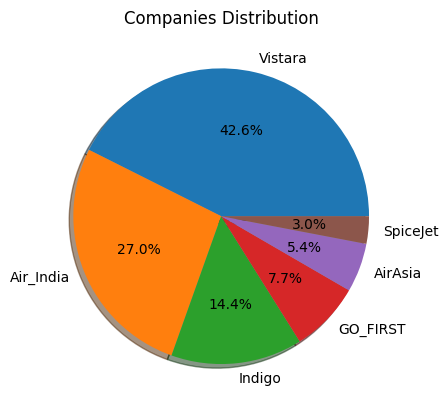

In [8]:
plt.figure(figsize=(10,6))
fig,ax=plt.subplots()
ax.pie(com_counts_table.values.squeeze(),labels=com_counts_table.index,autopct='%1.1f%%',shadow=True)
plt.title('Companies Distribution')
plt.show()

## Flight Number Between Cities

In [9]:
flight_cities_num=df.pivot_table(index='source_city',columns='destination_city',aggfunc='count',values='price')

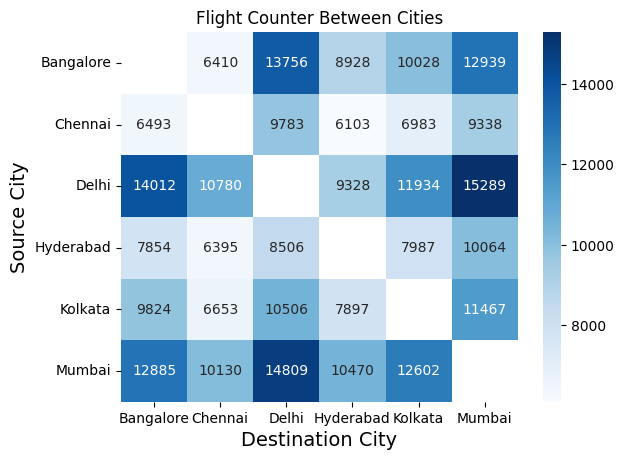

In [10]:
sns.heatmap(flight_cities_num,annot=True,cmap='Blues',fmt='.0f')
plt.title('Flight Counter Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

## Average Prices for each Company

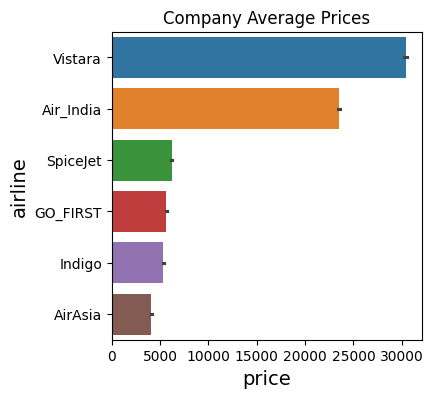

In [11]:
plt.figure(figsize=(4,4))
sns.barplot(x='price',y='airline',data=df.sort_values('price',ascending=False),hue='airline')
plt.title('Company Average Prices')
plt.xlabel('price',fontsize=14)
plt.ylabel('airline',fontsize=14)
plt.show()

## Price Distribution of Calsses

<Figure size 400x400 with 0 Axes>

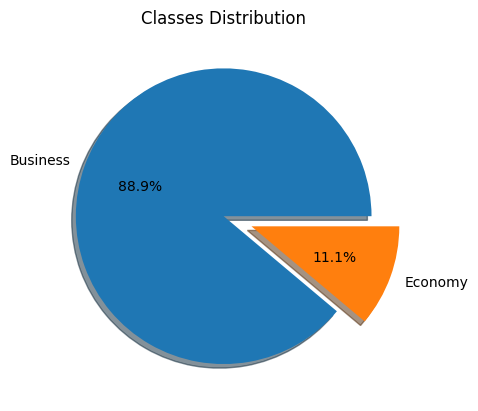

In [12]:
plt.figure(figsize=(4,4))
Dist_Class_price=df.groupby('class').price.agg('mean')
class_price=pd.DataFrame(Dist_Class_price)
fig,ax=plt.subplots()
ax.pie(class_price.values.squeeze(),labels=class_price.index,autopct='%1.1f%%',shadow=True,explode=(0,0.2))
plt.title('Classes Distribution')
plt.show()

## Number of Stops per airlines

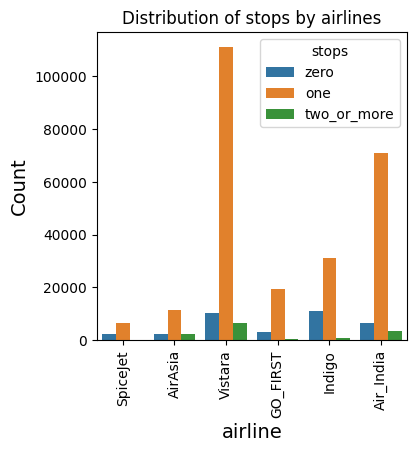

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='airline',data=df,hue='stops')
plt.title('Distribution of stops by airlines')
plt.xlabel('airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

## Most flights Destination by Airlines

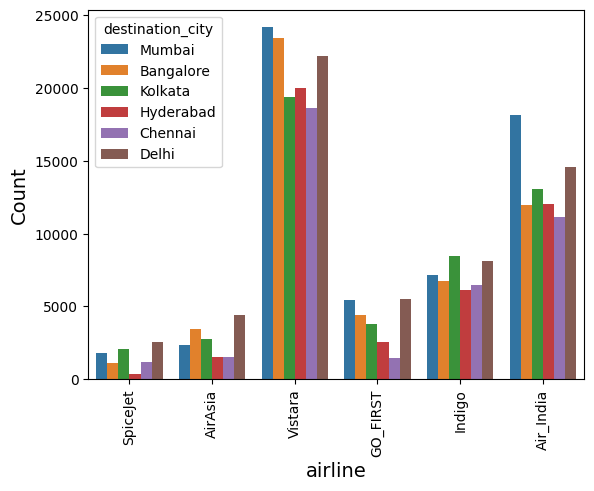

In [14]:
sns.countplot(x='airline',hue='destination_city',data=df)
plt.xlabel('airline',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)
plt.show()

## Total Average Prices of Departure Time

<Figure size 1000x600 with 0 Axes>

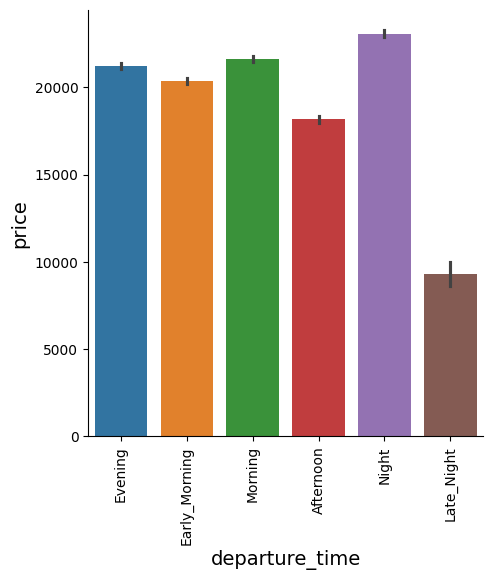

In [15]:
plt.figure(figsize=(10,6))
sns.catplot(x='departure_time',y='price',data=df,kind='bar',hue='departure_time')
plt.xlabel('departure_time',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('price',fontsize=14)
plt.show()

## Days Left Affection on prices

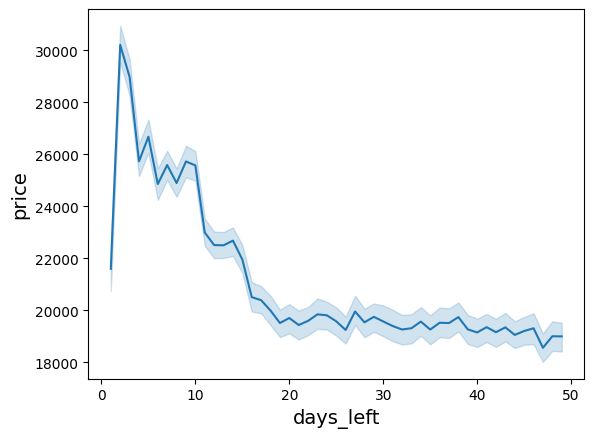

In [16]:

sns.lineplot(x='days_left',y='price',data=df)
plt.xlabel('days_left',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

# Bivirate Visualization

## Average Duration Between Cities

In [17]:
average_duration_cities=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='duration')

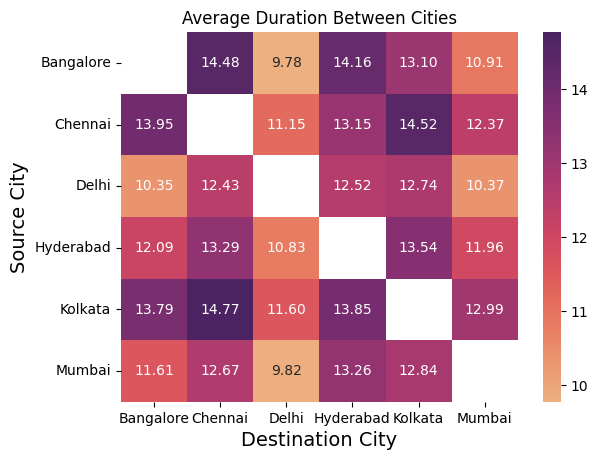

In [18]:
sns.heatmap(average_duration_cities,annot=True,cmap='flare',fmt='.2f')
plt.title('Average Duration Between Cities')
plt.xlabel('Destination City',fontsize=14)
plt.ylabel('Source City',fontsize=14)
plt.show()

## prices of Airline per Class

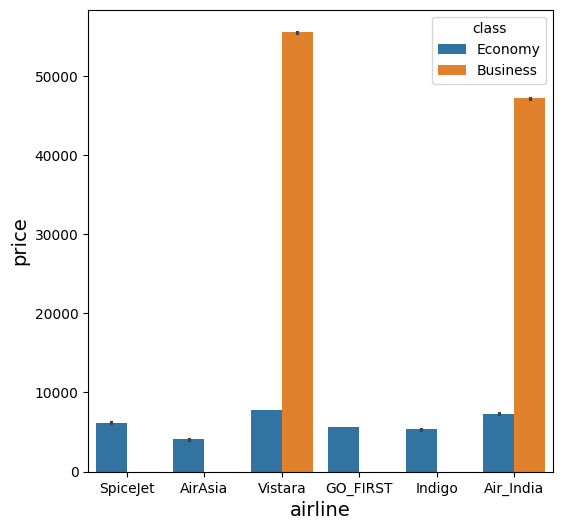

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(x='airline',y='price',data=df,hue='class')
plt.xlabel('airline',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

## Average Prices of Departure_Time by Airlines

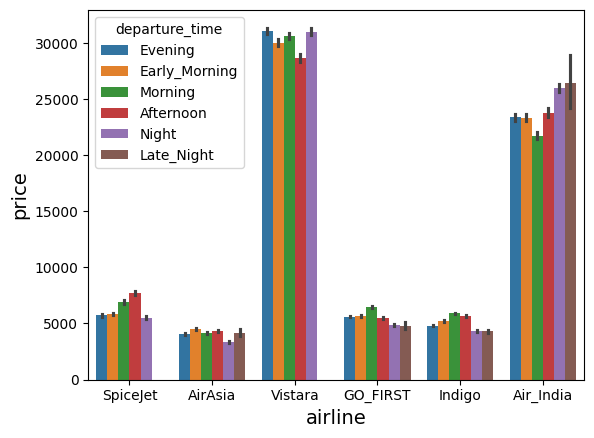

In [20]:
sns.barplot(x='airline',y='price',data=df,hue='departure_time')
plt.xlabel('airline',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

## Average Destination City Prices by Airline

In [21]:
AVG_des_air_price=df.pivot_table(index='destination_city',columns='airline',aggfunc='mean',values='price')

Text(0, 0.5, 'Destination city')

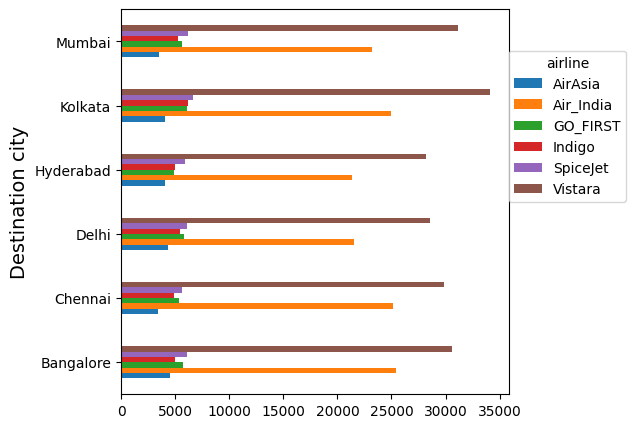

In [22]:
plot=AVG_des_air_price.plot(kind='barh',figsize=(5,5))
sns.move_legend(plot,(1,0.5))
plt.ylabel('Destination city',fontsize=14)

# MultiVirate Visualization

## Average Prices VS Departure Time by Airline

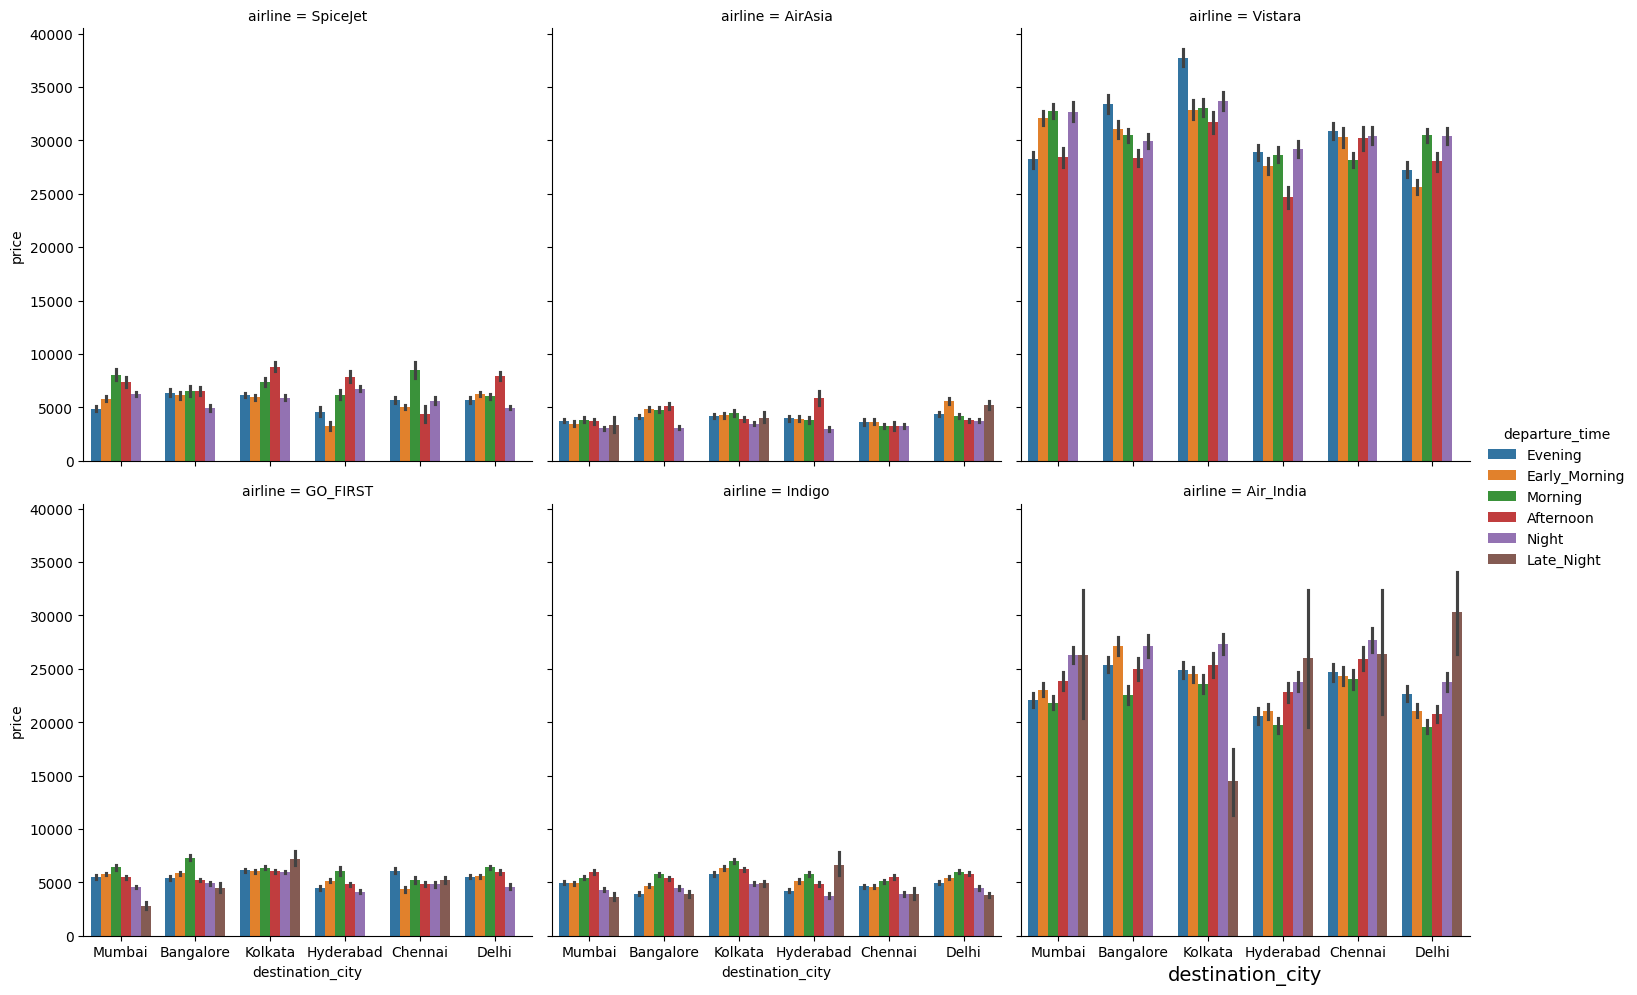

In [23]:

sns.catplot(x='destination_city',y='price',data=df,hue='departure_time',kind='bar',col='airline',col_wrap=3)
plt.xlabel('destination_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

## Average Prices Between Cities by Airlines

In [24]:
flight_cities_avg=df.pivot_table(index='source_city',columns='destination_city',aggfunc='mean',values='price')
df_cities_flight_price=pd.DataFrame(flight_cities_avg)
df_cities_flight_price

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,NaN,23321.850078,17723.313972,21226.121192,23500.061229,23128.618672
Chennai,25081.850454,NaN,18981.863948,21591.345404,22669.932407,22765.849647
Delhi,17880.216315,19369.881354,NaN,17347.288379,20566.409418,19355.829812
Hyderabad,21347.177998,21848.065989,17243.945685,NaN,20823.893201,20080.865759
Kolkata,22744.808428,23660.361040,19422.354559,21500.011397,NaN,22078.883579
Mumbai,23147.873807,22781.899112,18725.320008,21004.046705,22379.146723,NaN


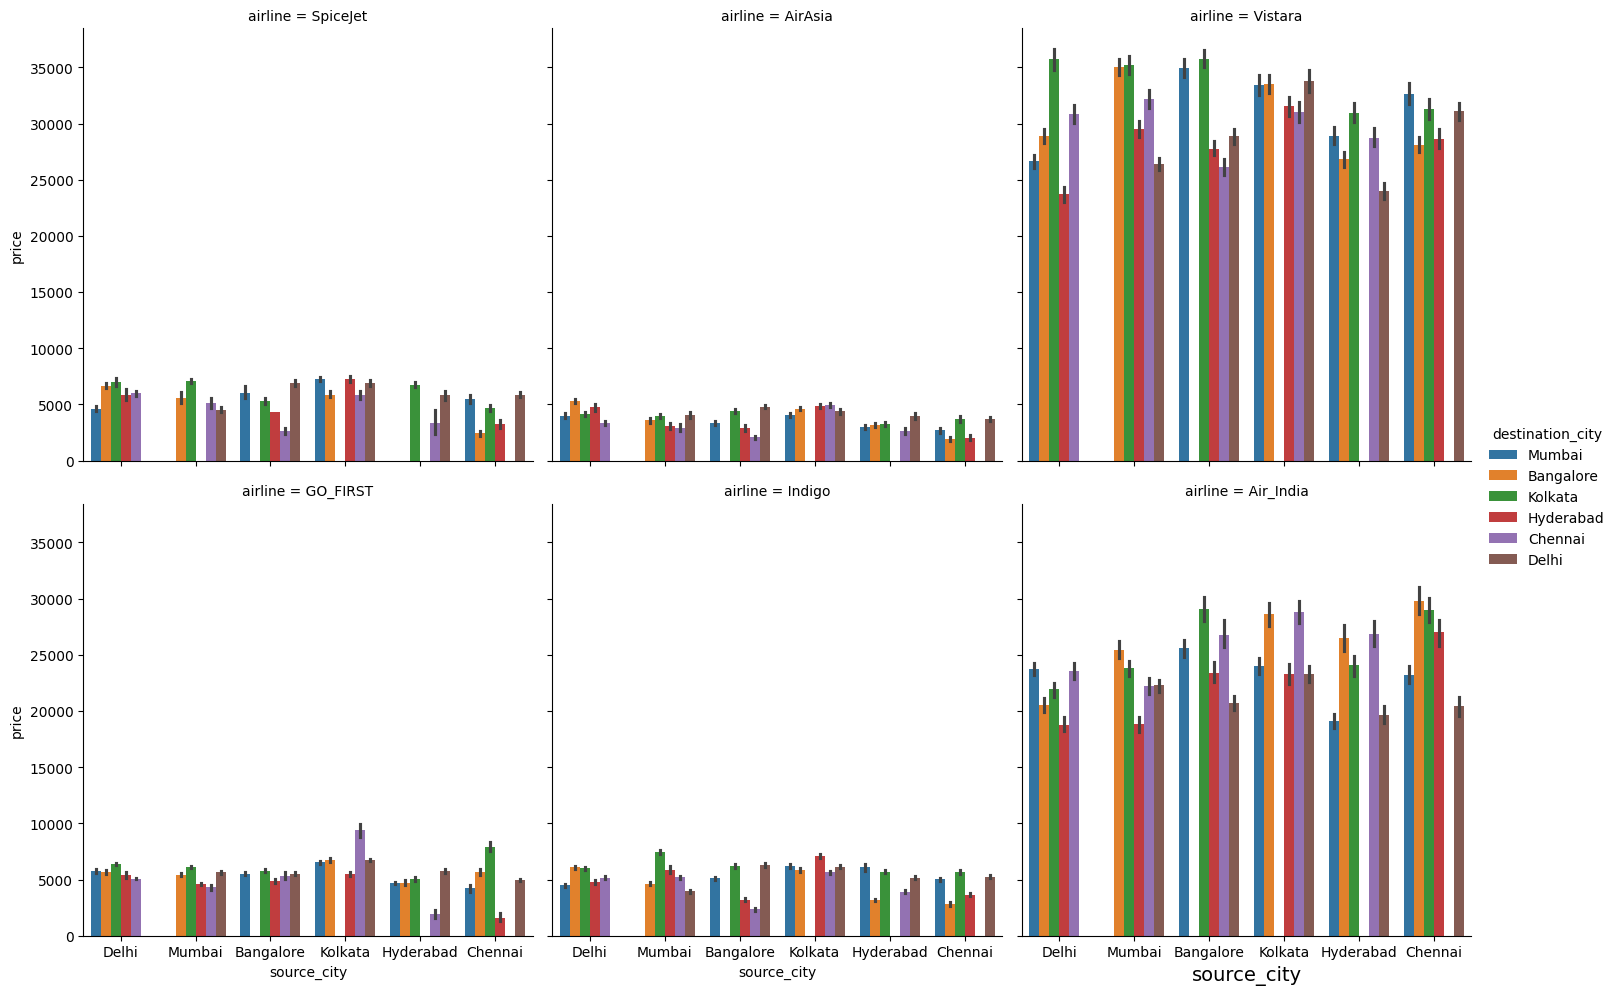

In [25]:

sns.catplot(x=df['source_city'],y=df['price'],data=df_cities_flight_price,hue=df['destination_city'],kind='bar',col=df['airline'],col_wrap=3)
plt.xlabel('source_city',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.show()

# Checking The Correlation

In [26]:
price_corr=df.corr(numeric_only=True)['price'].sort_values(ascending=False)
price_corr

price        1.000000
duration     0.204222
days_left   -0.091949
Name: price, dtype: float64

<Axes: >

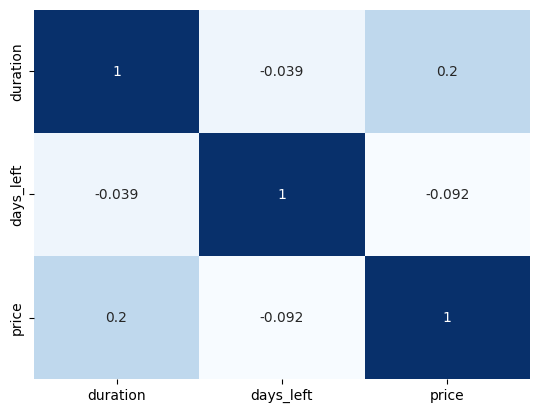

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap='Blues')

# spliting Data

In [28]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [29]:
edit_class={'Economy':1,
            'Business':2}
df['class']=df['class'].map(edit_class)

In [30]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [31]:
edit_stops={'two_or_more':1,
            'one':2,
              'zero':3    }
df['stops']=df['stops'].map(edit_stops)

In [32]:
X=df.drop(['flight','price'],axis=1)
y=df['price']

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((240122, 9), (240122,), (60031, 9), (60031,))

In [34]:

num_col=[col for col in X_train.columns if X_train[col].dtype in ['float32','float64','int32','int64']]
cat_col=[col for col in X_train.columns if X_train[col].dtype not in ['float32','float64','int32','int64']]

# Piplining for Categorical & Numerical Features

In [35]:
num_pip=Pipeline(steps=[
                 ('selector',DataFrameSelector(num_col)),
                  ('imputer',SimpleImputer(strategy='median')),
                   ('scaler',StandardScaler())
])

cat_pip=Pipeline(steps=[
                 ('selector',DataFrameSelector(cat_col)),
                 ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                  ('ohe',OneHotEncoder(sparse_output=False))

])

tot_pip=FeatureUnion(transformer_list=[
                                     ('num_pip',num_pip),
                                      ('cat_pip',cat_pip)
])

X_train_final=tot_pip.fit_transform(X_train)
X_test_final=tot_pip.transform(X_test)

# Building Models

In [36]:
lin_reg=LinearRegression()
lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [37]:
## Train Eval
y_pred_lin_train=lin_reg.predict(X_train_final)
rmse_train_lin=(mean_squared_error(y_train,y_pred_lin_train))**0.5
amse_train_lin=mean_absolute_error(y_train,y_pred_lin_train)
r2s_train_lin=r2_score(y_train,y_pred_lin_train)

print (f'RMSE for Training Data ---- > {rmse_train_lin:0.2f}')
print (f'AMSE for Training Data ---- > {amse_train_lin:0.2f}')
print (f'R2Score for Training Data ---- > {r2s_train_lin:0.2f}')

RMSE for Training Data ---- > 6808.96
AMSE for Training Data ---- > 4525.61
R2Score for Training Data ---- > 0.91


In [38]:
## Test
y_pred_lin_test=lin_reg.predict(X_test_final)
rmse_test_lin=(mean_squared_error(y_test,y_pred_lin_test))**0.5
amse_test_lin=mean_absolute_error(y_test,y_pred_lin_test)
r2s_test_lin=r2_score(y_test,y_pred_lin_test)

print (f'RMSE for test Data ---- > {rmse_test_lin:0.2f}')
print (f'AMSE for test Data ---- > {amse_test_lin:0.2f}')
print (f'R2Score for test Data ---- > {r2s_test_lin:0.2f}')

RMSE for test Data ---- > 6814.93
AMSE for test Data ---- > 4500.40
R2Score for test Data ---- > 0.91


## SGDRegressor

In [39]:
sgd_reg=SGDRegressor(alpha=0.0002,max_iter=10000,eta0=0.002)
sgd_reg.fit(X_train_final,y_train)

SGDRegressor(alpha=0.0002, eta0=0.002, max_iter=10000)

In [40]:
## Train
y_sgd_train_pred=sgd_reg.predict(X_train_final)
rmse_sgd_pred_train=(mean_squared_error(y_train,y_sgd_train_pred))**0.5
abs_sgd_pred_train=mean_absolute_error(y_train,y_sgd_train_pred)
r2s__sgd_pred_train=r2_score(y_train,y_sgd_train_pred)

print(f'RMSE for sgd Train Data ---> {rmse_sgd_pred_train:.2f}')
print(f'AMSE for sgd Train Data ---> {abs_sgd_pred_train:.2f}')
print(f'R2Score for sgd Train Data ---> {r2s__sgd_pred_train:.2f}')

RMSE for sgd Train Data ---> 6809.54
AMSE for sgd Train Data ---> 4520.96
R2Score for sgd Train Data ---> 0.91


In [41]:
## test

y_sgd_pred_test=sgd_reg.predict(X_test_final)
rmse_sgd_pred_test=(mean_squared_error(y_test,y_sgd_pred_test))**0.5
abs_sgd_pred_test=mean_absolute_error(y_test,y_sgd_pred_test)
r2s__sgd_pred_test=r2_score(y_test,y_sgd_pred_test)

print(f'RMSE forsgd test Data ---> {rmse_sgd_pred_test:.2f}')
print(f'AMSE for sgd test Data ---> {abs_sgd_pred_test:.2f}')
print(f'R2Score for sgd test Data ---> {r2s__sgd_pred_test:.2f}')

RMSE forsgd test Data ---> 6815.79
AMSE for sgd test Data ---> 4496.02
R2Score for sgd test Data ---> 0.91


## Random Forest

In [42]:
rf_reg=RandomForestRegressor(n_estimators=150,max_depth=6,n_jobs=-1,random_state=42,max_samples=0.8)
rf_reg.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [43]:
## train
y_rf_pred_train=rf_reg.predict(X_train_final)
rmse_rf_pred_train=(mean_squared_error(y_train,y_rf_pred_train))**0.5
abs_rf_pred_train=mean_absolute_error(y_train,y_rf_pred_train)
r2s_rf_pred_train=r2_score(y_train,y_rf_pred_train)
print(f'RMSE For Train Data-->{rmse_rf_pred_train:0.2f}')
print(f'AMSE For Train Data-->{abs_rf_pred_train:0.2f}')
print(f'R@Score For Train Data-->{r2s_rf_pred_train:0.2f}')

RMSE For Train Data-->5223.55
AMSE For Train Data-->2996.90
R@Score For Train Data-->0.95


In [44]:
#test
y_rf_pred_test=rf_reg.predict(X_test_final)
rmse_rf_pred_test=(mean_squared_error(y_test,y_rf_pred_test))**0.5
abs_rf_pred_test=mean_absolute_error(y_test,y_rf_pred_test)
r2s_rf_pred_test=r2_score(y_test,y_rf_pred_test)

print(f'RMSE for rf test Data ---> {rmse_rf_pred_test:.2f}')
print(f'AMSE for rf test Data ---> {abs_rf_pred_test:.2f}')
print(f'R2Score for rf test Data ---> {r2s_rf_pred_test:.2f}')

RMSE for rf test Data ---> 5281.69
AMSE for rf test Data ---> 2999.87
R2Score for rf test Data ---> 0.95


## XGBOOST

In [45]:
xgb_reg=XGBRegressor(n_estimators=150,max_depth=8,learning_rate=0.1,subsample=0.8,n_jobs=-1, random_state=42)
xgb_reg.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [46]:
##Train
y_xgb_pred_train=xgb_reg.predict(X_train_final)
rmse_xgb_pred_train=(mean_squared_error(y_train,y_xgb_pred_train))**0.5
abs_xgb_pred_train=mean_absolute_error(y_train,y_xgb_pred_train)
r2s_xgb_pred_train=r2_score(y_train,y_xgb_pred_train)
print(f'RMSE For Train Data-->{rmse_xgb_pred_train:0.2f}')
print(f'AMSE For Train Data-->{abs_xgb_pred_train:0.2f}')
print(f'R@Score For Train Data-->{r2s_xgb_pred_train:0.2f}')

RMSE For Train Data-->2934.66
AMSE For Train Data-->1648.84
R@Score For Train Data-->0.98


In [47]:
## test
y_xgb_pred_test=xgb_reg.predict(X_test_final)
rmse_xgb_pred_test=(mean_squared_error(y_test,y_xgb_pred_test))**0.5
abs_xgb_pred_test=mean_absolute_error(y_test,y_xgb_pred_test)
r2s_xgb_pred_test=r2_score(y_test,y_xgb_pred_test)

print(f'RMSE for rf test Data ---> {rmse_xgb_pred_test:.2f}')
print(f'AMSE for rf test Data ---> {abs_xgb_pred_test:.2f}')
print(f'R2Score for rf test Data ---> {r2s_xgb_pred_test:.2f}')

RMSE for rf test Data ---> 3159.98
AMSE for rf test Data ---> 1747.28
R2Score for rf test Data ---> 0.98


In [48]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


In [49]:
pipreqs

NameError: name 'pipreqs' is not defined